# Task 5 - Bifurcation in crowd dynamics

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

import helpers.sir as sir

## 1. Simulate the S, I, R numbers for a given parametrization

### 1.1 Specify Parameters

In [14]:
# parameters
random_state = 12345
t_0 = 0
t_end = 1000
NT = t_end - t_0
# if these error tolerances are set too high, the solution will be qualitatively (!) wrong
rtol = 1e-8
atol = 1e-8

# SIR model parameters
beta = 11.5
A = 20
d = 0.1
nu = 1
b = 0.022  # change in [0.01, 0.03]
mu0 = 10  # minimum recovery rate
mu1 = 10.45  # maximum recovery rate

# information
print("Reproduction number R0=", sir.R0(beta, d, nu, mu1))
print("Globally asymptotically stable if beta <=d+nu+mu0. This is", beta <= d + nu + mu0)

Reproduction number R0= 0.9956709956709958
Globally asymptotically stable if beta <=d+nu+mu0. This is False


### 1.2 Run the simulation

In [15]:
# simulation
rng = np.random.default_rng(random_state)

#SIM0 = rng.uniform(low=(190, 0, 1), high=(199, 0.1, 8), size=(3,))
#SIM0 = [195.3, 0.052, 4.4]
SIM0 = [195.7, 0.03, 3.92]
#SIM0 = [193, 0.08, 6.21]


time = np.linspace(t_0, t_end, NT)
sol = solve_ivp(
    sir.model,
    t_span=[time[0], time[-1]],
    y0=SIM0,
    t_eval=time,
    args=(mu0, mu1, beta, A, d, nu, b),
    method="LSODA",
    rtol=rtol,
    atol=atol,
)

### 1.3 Show plots

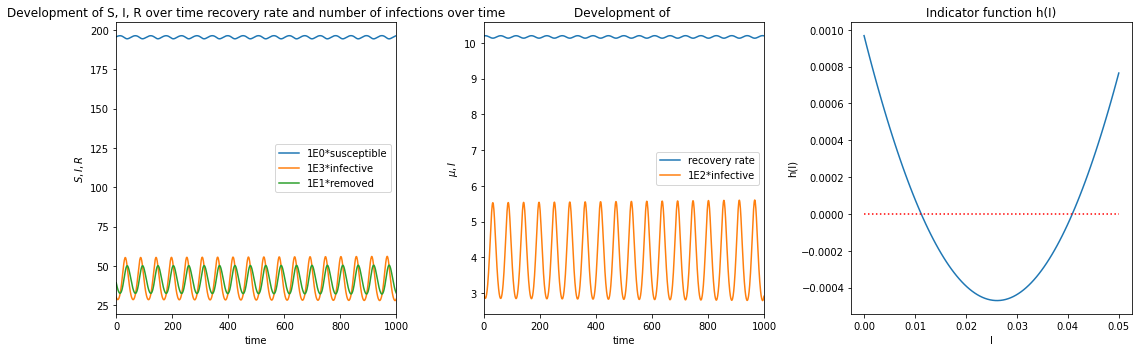

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(sol.t, sol.y[0] - 0 * sol.y[0][0], label="1E0*susceptible")
ax[0].plot(sol.t, 1e3 * sol.y[1] - 0 * sol.y[1][0], label="1E3*infective")
ax[0].plot(sol.t, 1e1 * sol.y[2] - 0 * sol.y[2][0], label="1E1*removed")
ax[0].set_xlim([0, t_end])
ax[0].set_title("Development of S, I, R over time recovery rate and number of infections over time")
ax[0].legend()
ax[0].set_xlabel("time")
ax[0].set_ylabel(r"$S,I,R$")


ax[1].plot(sol.t, sir.mu(b, sol.y[1], mu0, mu1), label="recovery rate")
ax[1].plot(sol.t, 1e2 * sol.y[1], label="1E2*infective")
ax[1].set_xlim([0, t_end])
ax[1].set_title("Development of ")
ax[1].legend()
ax[1].set_xlabel("time")
ax[1].set_ylabel(r"$\mu,I$")

I_h = np.linspace(-0.0, 0.05, 100)
ax[2].plot(I_h, sir.h(I_h, mu0, mu1, beta, A, d, nu, b))
ax[2].plot(I_h, 0 * I_h, "r:")
ax[2].set_title("Indicator function h(I)")
ax[2].set_xlabel("I")
ax[2].set_ylabel("h(I)")

fig.tight_layout()

### Explanation:
For $b << 0.022$: the numbers of susceptible, infected and removed people oscillate until they reach a point where a constant number of people get infected.

For $b<0.022$: the numbers of susceptible, infected and removed people oscillate with a decreasing amplitude.

For $b = 0.022$: the numbers of susceptible, infected and removed people oscillate with a constant amplitude.

For $b>0.022$: the numbers of susceptible, infected and removed people oscillate with a increasing magnitude until it reaches a constant amplitude.

For $b>>0.022$: the curves of infected and removed people are decreasing and approaching 0 without observable oscillations or effects on the recovery rate.

The oscillating kind of behavior can be observed for many infectious diseases in reality [5]. One is able to see that a high number of infections reduces the recovery rate. If the resources of the health system have been used up, recoveries become more unlikely.

## 2. Visualize single trajectories

### 2.1 Specify parameters

In [17]:
# parameters
random_state = 12345
t_0 = 0
t_end = 1000
NT = t_end - t_0
# if these error tolerances are set too high, the solution will be qualitatively (!) wrong
rtol = 1e-8
atol = 1e-8

# SIR model parameters
beta = 11.5
A = 20
d = 0.1
nu = 1
b = 0.022
mu0 = 10  # minimum recovery rate
mu1 = 10.45  # maximum recovery rate

# information
print("Reproduction number R0=", sir.R0(beta, d, nu, mu1))
print("Globally asymptotically stable if beta <=d+nu+mu0. This is", beta <= d + nu + mu0)

Reproduction number R0= 0.9956709956709958
Globally asymptotically stable if beta <=d+nu+mu0. This is False


### 2.2 Run simulation

In [18]:
time = np.linspace(t_0, 15000, NT)

SIM0 = [195.3, 0.052, 4.4] # what happens with this initial condition when b=0.022? -- it progresses VERY slowly. Needs t_end to be super large.
sol0 = solve_ivp(
    sir.model,
    t_span=[time[0],time[-1]],
    y0=SIM0,
    t_eval=time,
    args=(mu0, mu1, beta, A, d, nu, b),
    method='DOP853', rtol=rtol,
    atol=atol)

SIM1 = [195.7, 0.03, 3.92]  # what happens with this initial condition when b=0.022?
sol1 = solve_ivp(
    sir.model,
    t_span=[time[0], time[-1]],
    y0=SIM1,
    t_eval=time,
    args=(mu0, mu1, beta, A, d, nu, b),
    method="DOP853",
    rtol=rtol,
    atol=atol,
)

SIM2 = [193, 0.08, 6.21]  # what happens with this initial condition when b=0.022?
sol2 = solve_ivp(
    sir.model,
    t_span=[time[0], time[-1]],
    y0=SIM2,
    t_eval=time,
    args=(mu0, mu1, beta, A, d, nu, b),
    method="DOP853",
    rtol=rtol,
    atol=atol,
)

### 2.3 Plot results

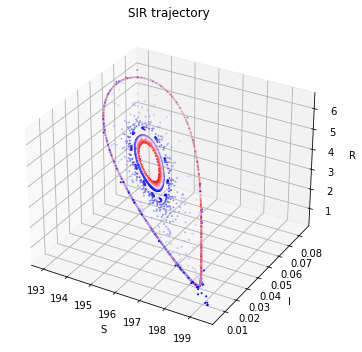

In [19]:
cmap = ["BuPu", "Purples", "bwr"][1]

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")

#ax.plot(sol.y[0], sol.y[1], sol.y[2], 'r-');
ax.scatter(sol0.y[0], sol0.y[1], sol0.y[2], s=1, c=time, cmap='bwr'); # put in comment in order to visualize trajectories of individual starting points

#ax.plot(sol.y[0], sol.y[1], sol.y[2], 'g-');
ax.scatter(sol1.y[0], sol1.y[1], sol1.y[2], s=1, c=time, cmap='bwr') # put in comment in order to visualize trajectories of individual starting points

#ax.plot(sol.y[0], sol.y[1], sol.y[2], 'b-');
ax.scatter(sol2.y[0], sol2.y[1], sol2.y[2], s=1, c=time, cmap='bwr') # put in comment in order to visualize trajectories of individual starting points

ax.set_xlabel("S")
ax.set_ylabel("I")
ax.set_zlabel("R")

ax.set_title("SIR trajectory")
fig.tight_layout()

### Subtask 3
plot at b<0.022: 

all points spiral inwards to a focus.

plot at b=0.022:

The trajectory of the point (S= 195.3, I= 0.052, R= 4.4) spirals inwards to the stable focus $E_2$ (red curve).

The trajectory of the point (S= 195.7, I= 0.03, R= 3.92) spirals outwards to a stable limit cycle (blue curve).

The trajectory of the point (S= 193, I= 0.08, R= 6.21) spirals inwards to the same stable limit cycle (purple curve).
(see page 1675 of [5])

plot at b=0.023:

all points spiral outwards to limit cycle


### Subtask 4
Kind of bifurcation: Hopf bifurcation

The reasons why this is a Hopf bifurcation can be found in the following.

From our observations and Theorem 4.5 of [5], one is able to draw the conclusion that the Lyapunov coefficients are $\sigma_1 = 0$ and $\sigma_2 \neq 0$. $E_2$ is a weak focus and there is one stable and one unstable limit cycle from the Hopf bifurcation.

Normal Norm of Hopf bifurcation [Kuznetsov, 2004]:
$\dot{z} = (\alpha + i) * z - z * | z | ^2$
where $z = x_1 + i * x_2$ and $\alpha$ is the parameter of the system.

Happens for b = 0.022

### Further Explanation why this is a Hopf bifurcation
From Theorem 4.4 of [5] we know that it is a generic Hopf bifurcation if $I_2 = H_m$, $I_2 = H_M$ or $I_2 = H_m = H_M$

In [20]:
# computations

delta0 = d + nu + mu0
delta1 = d + nu + mu1

# formulas computing I_2 in [5]
A_1 = (d + nu + mu0) * (beta - nu)
B_1 = (d + nu + mu0 - beta) * A + (beta - nu) * (d + nu + mu1) * b
d_0 = ((beta - nu) **2) * (delta1 **2) * (b **2) - 2 * A * (beta - nu) * (beta * (mu1 - mu0) + delta0 * (delta1 - beta)) * b + (A ** 2) * (beta - delta0) **2
I_2 = - B_1 + np.sqrt(d_0)
I_2 /= 2 * A_1
print("I_2: " + str(I_2))


I_2: 0.04116243794930764


In [21]:
# compute roots of indicator function
c0 = b ** 2 * d * A
c1 = b * ((mu0 - mu1 + 2 * d) * A + (beta - nu) * b * d)
c2 = (mu1 - mu0) * b * nu + 2 * b * d * (beta - nu) + d * A
c3 = d * (beta - nu)
roots = np.roots([c3, c2, c1, c0])
print("roots: " + str(roots))

roots: [-2.01029065  0.04088297  0.01121721]


According to [5], the second root is defined as $H_m \approx 0.041$ and the third root is $H_M = 0.011$ for $b = 0.022$

One is able to observe that $I_2 \approx H_m$. So, we observe a Hopf bifurcation

### Why this is not a Bogdanov-Takens bifurcation
For a Bogdanov-Takens bifurcation, we need $\Delta_0 = 0$ $h(I^*) = 0$ according to [5]. Furtermore, we distinguish between Bogdanov-Takens bifurcation of codimension 2 or 3 by analyzing $h'(I^*)$. For codimension 3, $h'(I^*) = 0$ is required.

In [22]:

# compute Delta0
c2 = ((beta - nu) **2) * (delta1 **2)
c1 = - 2 * A * (beta - nu) * (beta * (mu1 - mu0) + delta0 * (delta1 - beta))
c0 = (A ** 2) * (beta - delta0) **2
d_0 = c2 * (b ** 2) + c1 * b + c0
print("Delta0: " + str(d_0))

# compute I*
I_star = (d + nu + mu0 - beta) * A + (beta - nu) * (d + nu + mu1) * b
I_star /= -2 * (d + nu + mu0) * (beta - nu)

# compute h(I*)
h_star = sir.h(I_star, mu0, mu1, beta, A, d, nu, b)
print("h(I_star): " + str(h_star))

# compute h'(I*)
c1 = b * ((mu0 - mu1 + 2 * d) * A + (beta - nu) * b * d)
c2 = (mu1 - mu0) * b * nu + 2 * b * d * (beta - nu) + d * A
c3 = d * (beta - nu)
dh_star = c1 + c2 * I_star + c3 * I_star ** 2
print("h'(I_star): " + str(dh_star))

Delta0: 18.173290802500297
h(I_star): -0.00044815772602447554
h'(I_star): -0.061911001779143604


It can be observed that the requirements of a Bogdanov-Takens bifurcation are not met for $b = 0.022$.
That is why, for $ b = 0.022$, the Hopf bifurcation occurs without the Bogdanov-Takens bifurcation.

### Subtask 5
Reproduction Rate:
$R_0 = \frac{\beta}{\delta + \nu + \mu_1}$

$\beta$: "average number of adequate contacts per unit time with infectious individuals" [exercise sheet]

$\delta$: "per capita natural death rate of the population"[Shan, Zhu]

$\nu$: "per capita disease-induced death rate"[Shan, Zhu]

$\mu_1$: maximum recovery rate

The reproduction rate $R_0$ depends on the number of infectious contacts, the natural death rate, the disease-related death rate and the maximum recovery rate.
A small average number of contacts with infectious persons results in a small $R_0$-value which will eventually eliminate the disease if it stays below $R_0 = 1$. The number of infected people will tend to 0.
This is why it is particularly important to reduce one's contacts in order to reduce the number of contacts with infectious persons and therefore support an elimination of a disease.
With a higher number of contacts with infectious persons, $R_0$ might exceed the threshold of 1 and the disease won't be stopped. The number of infected people will increase.
While $\delta$ and $\nu$ are constants that cannot be changed in a short period of time, the other important factor is the maximum recovery rate that is based on the number of available beds in hospitals. Here, a high number of beds lead to a smaller $R_0$. If only a few beds are available, $R_0$ will be higher.


### Subtask 6

If $E_0$ is an attracting node, it means that the system will stay in this disease free state for $R_0 < 1$.
Values close to $E_0$ will lead to a disease free equilibrium, meaning that the disease will not spread among the people and eventually be eliminated.

### Bonus: Bogdanov-Takens Bifurcation

For a Bogdanov-Takens bifurcation, we need $\Delta_0 = 0$ $h(I^*) = 0$ according to [5]. Furtermore, we distinguish between Bogdanov-Takens bifurcation of codimension 2 or 3 by analyzing $h'(I^*)$. For codimension 3, $h'(I^*) = 0$ is required.

First, we try to find b for which a Bogdanov-Takens bifurcation occurs by $\Delta_0 = 0$

In [23]:
# compute Delta0
c2 = ((beta - nu) **2) * (delta1 **2)
c1 = - 2 * A * (beta - nu) * (beta * (mu1 - mu0) + delta0 * (delta1 - beta))
c0 = (A ** 2) * (beta - delta0) **2
d_0 = c2 * (b ** 2) + c1 * b + c0
d_0_roots = np.roots([c2, c1, c0])
print("roots of Delta0: " + str(d_0_roots))

roots of Delta0: [0.13021058 0.03341882]


let's try $b \approx 0.033$ and compute $h(I^*)$

In [24]:
b = d_0_roots[1]
print("b: "+ str(b))

# compute I*
I_star = (d + nu + mu0 - beta) * A + (beta - nu) * (d + nu + mu1) * b
I_star /= -2 * (d + nu + mu0) * (beta - nu)

# compute h(I*)
h_star = sir.h(I_star, mu0, mu1, beta, A, d, nu, b)
print("h(I_star): " + str(h_star))

# compute h'(I*)
c1 = b * ((mu0 - mu1 + 2 * d) * A + (beta - nu) * b * d)
c2 = (mu1 - mu0) * b * nu + 2 * b * d * (beta - nu) + d * A
c3 = d * (beta - nu)
dh_star = c1 + c2 * I_star + c3 * I_star ** 2
print("h'(I_star): " + str(dh_star))

b: 0.03341882134415444
h(I_star): 2.7052182244263776e-05
h'(I_star): -0.1303109329121368


We can observe that $b \approx 0.033$ fulfills the requirements for a Bogdanov-Takens bifurcation of codimension 2.

Due to the limited time provided, we postpone the further analysis and visualization of this bifurcation.